importing libraries

In [119]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords

Reading Data

In [120]:
df=pd.read_csv('emails.csv')
print(df.head(10))
print(df.tail(10))

                                                text  label
0  Subject: naturally irresistible your corporate...      1
1  Subject: the stock trading gunslinger  fanny i...      1
2  Subject: unbelievable new homes made easy  im ...      1
3  Subject: 4 color printing special  request add...      1
4  Subject: do not have money , get software cds ...      1
5  Subject: great nnews  hello , welcome to medzo...      1
6  Subject: here ' s a hot play in motion  homela...      1
7  Subject: save your money buy getting this thin...      1
8  Subject: undeliverable : home based business f...      1
9  Subject: save your money buy getting this thin...      1
                                                   text  label
5718  Subject: altos na gas model  kim , i know you ...      0
5719  Subject: power market research  i came across ...      0
5720  Subject: re : visit to houston  fyi  - - - - -...      0
5721  Subject: ees risk management presentations for...      0
5722  Subject: re : vacat

Preprocessing Data

In [139]:
stop_words=stopwords.words('english')

def preprocess_text(text):
    text=text.lower()
    words=text.split()
    filtered_words=[i for i in words if i not in stop_words]
    return " ".join(filtered_words)
df['cleaned_text']=df['text'].apply(preprocess_text)

vectorizing the text

In [122]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

Dividing into testing and training dataset (30% testing, 70% training)

In [123]:
X=df['cleaned_text']
Y=df['label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) 

specifying model

In [124]:
model = MultinomialNB()

Best-First feature selection 

In [125]:
def best_first_feature_selection(X_train, X_test, Y_train, Y_test, model, max_features=15):
    num_features = X_train.shape[1]
    selected_features = []
    remaining_features = list(range(num_features))
    best_accuracy = 0
    while remaining_features:
        best_feature = None
        best_accuracy_this_round = 0
        for feature in remaining_features:
            selected_features.append(feature)
            X_train_selected = X_train[:, selected_features]
            X_test_selected = X_test[:, selected_features]
            model.fit(X_train_selected, Y_train)
            Y_pred = model.predict(X_test_selected)
            accuracy = accuracy_score(Y_test, Y_pred)
            
            if accuracy > best_accuracy_this_round:
                best_accuracy_this_round = accuracy
                best_feature = feature
            selected_features.remove(feature)
        
        if best_feature is not None:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            print(f"Feature {best_feature} selected, accuracy: {best_accuracy_this_round}")
        
        if max_features and len(selected_features) >= max_features:
            break
    
    return selected_features

selected_features = best_first_feature_selection(X_train_vec, X_test_vec, Y_train, Y_test, model)

Feature 0 selected, accuracy: 0.7626527050610821
Feature 7466 selected, accuracy: 0.7975567190226877
Feature 25243 selected, accuracy: 0.8225712623618383
Feature 17432 selected, accuracy: 0.8406050029086678
Feature 17968 selected, accuracy: 0.8539848749272833
Feature 11294 selected, accuracy: 0.8662012798138452
Feature 20606 selected, accuracy: 0.8859802210587551
Feature 757 selected, accuracy: 0.89586969168121
Feature 19868 selected, accuracy: 0.9045956951716114
Feature 739 selected, accuracy: 0.9115764979639325
Feature 19228 selected, accuracy: 0.9168121000581734
Feature 13843 selected, accuracy: 0.9220477021524142
Feature 21512 selected, accuracy: 0.9261198371146016
Feature 21806 selected, accuracy: 0.9301919720767888
Feature 2301 selected, accuracy: 0.9331006399069226


Training

In [126]:
X_train_selected = X_train_vec[:, selected_features]
X_test_selected = X_test_vec[:, selected_features]
model.fit(X_train_selected, Y_train)

MultinomialNB()

Making prediction

In [127]:
Y_pred = model.predict(X_test_selected)

Evaluation

In [128]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(Y_test, Y_pred))
selected_feature_names = [vectorizer.get_feature_names_out()[i] for i in selected_features]
print("\nSelected_features_names: \n", selected_feature_names)

Accuracy: 0.9331
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1311
           1       0.91      0.80      0.85       408

    accuracy                           0.93      1719
   macro avg       0.92      0.89      0.90      1719
weighted avg       0.93      0.93      0.93      1719


Selected_features_names: 
 ['00', 'click', 'save', 'life', 'macromedia', 'enron', 'online', '2005', 'net', '2000', 'money', 'guaranteed', 'penis', 'php', '70']


Confusion Matrix

<Axes: >

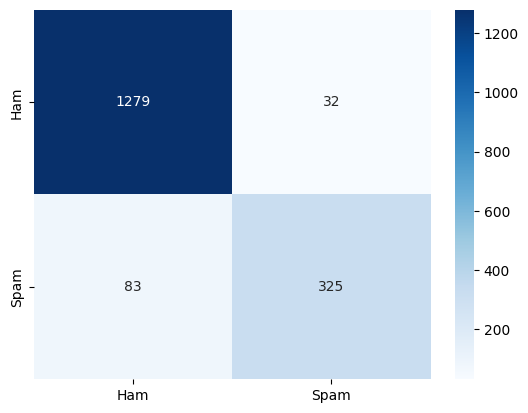

In [132]:
cm=confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])